In [ ]:
# Install required packages

In [1]:
!pip install pandas numpy matplotlib opencv-python-headless scikit-learn pillow joblib

In [ ]:
# Importing libraries

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import joblib
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from joblib import dump, load
import seaborn as sns  

In [ ]:
# File paths for datasets

In [3]:
normal_files = os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL")
print(normal_files[0:5])
print(normal_files[-5:])

pneumonia_files = os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA")
print(pneumonia_files[0:5])
print(pneumonia_files[-5:])

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1419-0001.jpeg', 'NORMAL2-IM-1422-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']
['person99_virus_183.jpeg', 'person9_bacteria_38.jpeg', 'person9_bacteria_39.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_41.jpeg']


In [ ]:
# Checking the number of images

In [4]:
print('Normal: ', len(normal_files))
print('Pneumonia: ', len(pneumonia_files))

Normal:  1341
Pneumonia:  3875


In [ ]:
# Assigning labels to data

In [5]:
Normal_label = [0] * len(normal_files)
Pneumonia_label = [1] * len(pneumonia_files)

print('Normal labels: ', len(Normal_label))
print('Pneumonia labels: ', len(Pneumonia_label))

Normal labels:  1341
Pneumonia labels:  3875


In [ ]:
# Concatenate all labels

In [6]:
labels = Normal_label + Pneumonia_label

print('Labels are: ', len(labels))
print(labels[0:5])
print(labels[-5:])

Labels are:  5216
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
# Display a sample of images

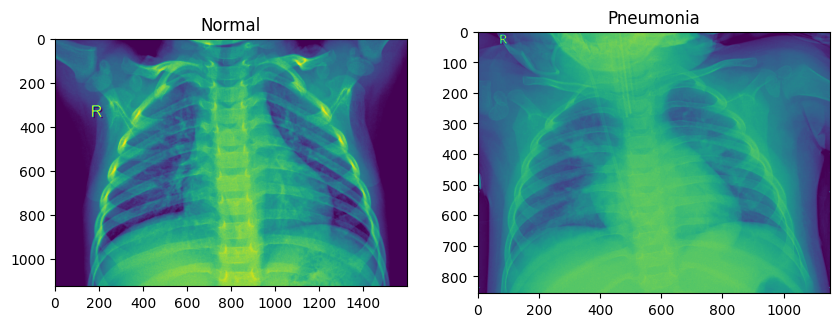

In [7]:
image_normal = mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\IM-0125-0001.jpeg")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_normal)
plt.title('Normal')

image_pneumonia = mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\person9_bacteria_39.jpeg")
plt.subplot(1, 2, 2)
plt.imshow(image_pneumonia)
plt.title('Pneumonia')
plt.show()

In [ ]:
# Load images into data arrays with resizing and conversion to RGB

In [8]:
normal_path = r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\\"
data = []
labels = []

for img_file in normal_files:
    image = Image.open(normal_path + img_file)
    image = image.resize((128, 128)) 
    image = image.convert('RGB') 
    image = np.array(image)
    data.append(image)
    labels.append(0) 

pneumonia_path = r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\\"
for img_file in pneumonia_files:
    image = Image.open(pneumonia_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(1)  

In [ ]:
# Convert data to numpy arrays for easier processing

In [9]:
data = np.array(data)
labels = np.array(labels)

print("Data type:", type(data))
print("Data shape:", data.shape)
print("Sample data shape:", data[0].shape)


Data type: <class 'numpy.ndarray'>
Data shape: (5216, 128, 128, 3)
Sample data shape: (128, 128, 3)


In [ ]:
# Flatten the images for clustering

In [10]:
data_flattened = data.reshape(len(data), -1)

In [ ]:
# Implementing KMeans Clustering

In [11]:
print("\nPerforming KMeans clustering...")

kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(data_flattened)


Performing KMeans clustering...


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Get cluster predictions and evaluate clustering

In [12]:
cluster_labels = kmeans.labels_

print("\nCluster labels:", cluster_labels[:10])
print(f"Number of images in cluster 0: {(cluster_labels == 0).sum()}")
print(f"Number of images in cluster 1: {(cluster_labels == 1).sum()}")


Cluster labels: [0 1 1 0 1 0 1 1 1 1]
Number of images in cluster 0: 2585
Number of images in cluster 1: 2631


In [ ]:
# Visualizing some clustered images

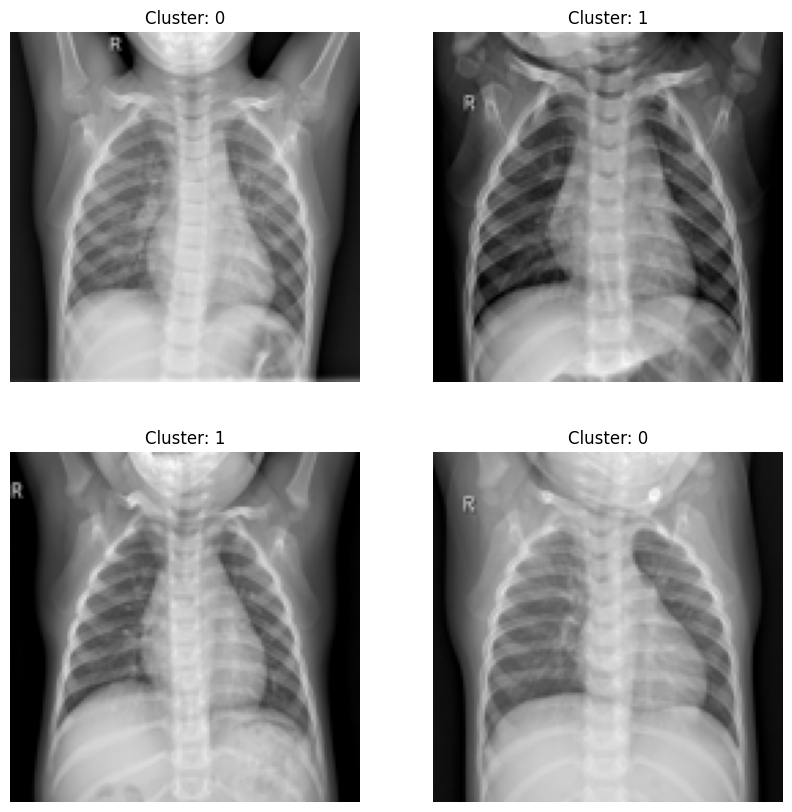

In [13]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(data[i])
    plt.title(f"Cluster: {cluster_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
# Visualize K-Means Clusters
# Create a DataFrame for easier plotting
# Assuming you have BMI and Fat Percentage columns (for demonstration)
# To create mock 'BMI' and 'Fat_Percentage' columns, you can modify as needed.
# Visualize K-Means Clusters

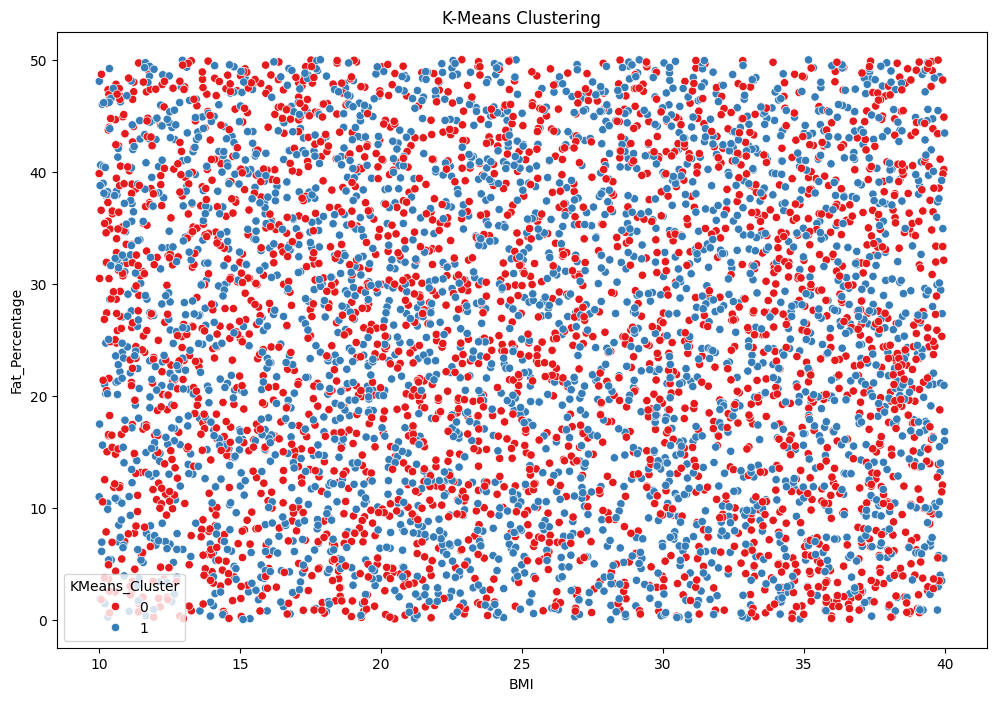

In [21]:
df_clusters = pd.DataFrame(data_flattened)
df_clusters['KMeans_Cluster'] = cluster_labels

df_clusters['BMI'] = np.random.rand(len(df_clusters)) * 30 + 10  # Random values for demo
df_clusters['Fat_Percentage'] = np.random.rand(len(df_clusters)) * 50  # Random values for demo


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clusters, x='BMI', y='Fat_Percentage', hue='KMeans_Cluster', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# Plot the distribution of images across clusters

C:\Users\gihan\AppData\Local\Temp\ipykernel_18636\41159325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clusters, x='KMeans_Cluster', palette='Set1')


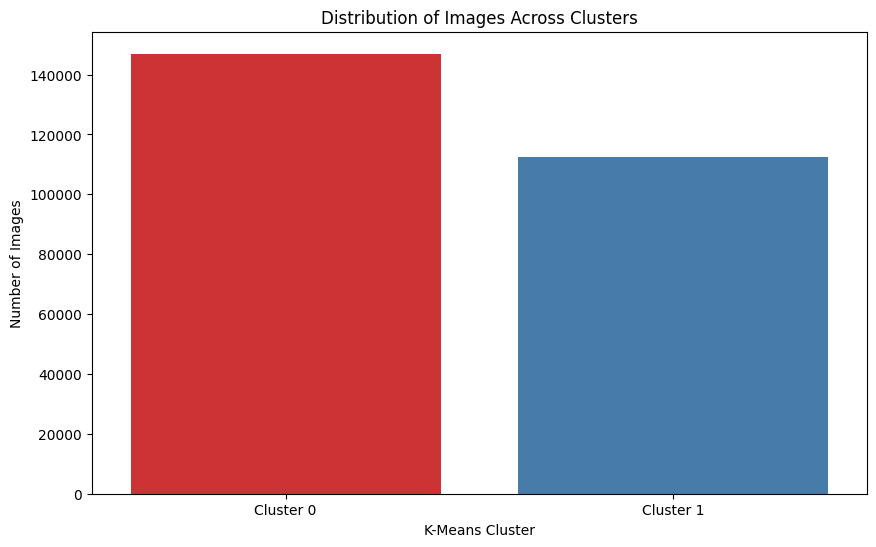

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clusters, x='KMeans_Cluster', palette='Set1')
plt.title('Distribution of Images Across Clusters')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Images')
plt.xticks(ticks=[0, 1], labels=['Cluster 0', 'Cluster 1'])  # Adjust labels if necessary
plt.show()